Below is an example Jupyter notebook (in a single script for convenience) that demonstrates how to implement and visualize the CUSUM method in a couple of different scenarios. The core idea is to generate synthetic data with known shifts, apply CUSUM, and then observe when those shifts get detected.

---


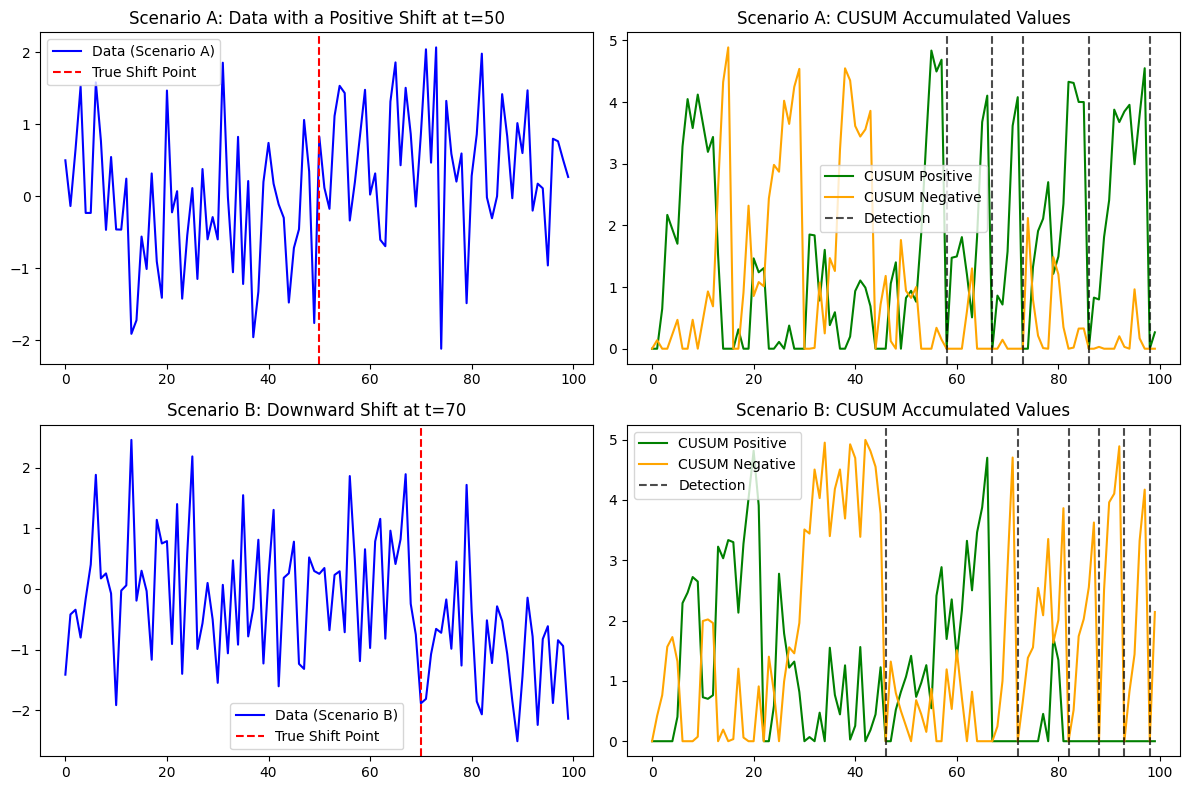

In [2]:
# CUSUM Demonstration in Two Scenarios

# ================================
# 1. Setup and Imports
# ================================
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# ================================
# 2. CUSUM Implementation
# ================================
def cusum(data, target=0.0, threshold=5.0, drift=0.0):
    """
    Perform CUSUM on a 1D array of data.
    
    Args:
        data (np.array): The data points to monitor.
        target (float): The nominal value or expected mean of the process.
        threshold (float): The decision threshold. 
                           When cumulative sum passes ±threshold, we signal a shift.
        drift (float): A constant drift term (if you want to penalize small steps).
                       Often set to zero if detecting any shift from target.
    
    Returns:
        g_pos (np.array): The positive cumulative sum series.
        g_neg (np.array): The negative cumulative sum series.
        pos_signals (list): Indices where positive CUSUM signals (shift above target).
        neg_signals (list): Indices where negative CUSUM signals (shift below target).
    """
    g_pos = np.zeros_like(data)
    g_neg = np.zeros_like(data)
    
    pos_signals = []
    neg_signals = []
    
    for i in range(1, len(data)):
        # Positive CUSUM
        g_pos[i] = max(0, g_pos[i-1] + (data[i] - target) - drift)
        # Negative CUSUM
        g_neg[i] = max(0, g_neg[i-1] - (data[i] - target) - drift)
        
        if g_pos[i] > threshold:
            pos_signals.append(i)
            # Reset after detection
            g_pos[i] = 0
            
        if g_neg[i] > threshold:
            neg_signals.append(i)
            # Reset after detection
            g_neg[i] = 0
            
    return g_pos, g_neg, pos_signals, neg_signals

# ================================
# 3. Generate Synthetic Data for Two Scenarios
# ================================

# -- Scenario A: Small positive shift at t=50 --
n_points = 100
data_scenario_a = np.random.normal(0, 1, n_points)
# Introduce a shift from index 50 onward
data_scenario_a[50:] += 0.5

# -- Scenario B: Sudden downward shift at t=70 --
data_scenario_b = np.random.normal(0, 1, n_points)
# Introduce a shift from index 70 onward
data_scenario_b[70:] -= 1.0

# ================================
# 4. Apply CUSUM on Both Scenarios
# ================================

threshold = 5.0
drift = 0.0  # No drift factor for simplicity
target = 0.0 # We assume the data should revolve around mean=0

# Scenario A
g_pos_a, g_neg_a, pos_signals_a, neg_signals_a = cusum(
    data_scenario_a,
    target=target,
    threshold=threshold,
    drift=drift
)

# Scenario B
g_pos_b, g_neg_b, pos_signals_b, neg_signals_b = cusum(
    data_scenario_b,
    target=target,
    threshold=threshold,
    drift=drift
)

# ================================
# 5. Plot the Results
# ================================

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ---- SCENARIO A ----
# Original Data
axes[0, 0].plot(data_scenario_a, label="Data (Scenario A)", color="blue")
axes[0, 0].set_title("Scenario A: Data with a Positive Shift at t=50")
axes[0, 0].axvline(50, color="red", linestyle="--", label="True Shift Point")
axes[0, 0].legend()

# CUSUM
axes[0, 1].plot(g_pos_a, label="CUSUM Positive", color="green")
axes[0, 1].plot(g_neg_a, label="CUSUM Negative", color="orange")
for p in pos_signals_a:
    axes[0, 1].axvline(p, color="black", linestyle="--", alpha=0.7, label="Detection" if p == pos_signals_a[0] else "")
axes[0, 1].set_title("Scenario A: CUSUM Accumulated Values")
axes[0, 1].legend()

# ---- SCENARIO B ----
# Original Data
axes[1, 0].plot(data_scenario_b, label="Data (Scenario B)", color="blue")
axes[1, 0].set_title("Scenario B: Downward Shift at t=70")
axes[1, 0].axvline(70, color="red", linestyle="--", label="True Shift Point")
axes[1, 0].legend()

# CUSUM
axes[1, 1].plot(g_pos_b, label="CUSUM Positive", color="green")
axes[1, 1].plot(g_neg_b, label="CUSUM Negative", color="orange")
for p in neg_signals_b:
    axes[1, 1].axvline(p, color="black", linestyle="--", alpha=0.7, label="Detection" if p == neg_signals_b[0] else "")
axes[1, 1].set_title("Scenario B: CUSUM Accumulated Values")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### How the Notebook Works

1. **Data Generation**  
   - **Scenario A**: We generate 100 points from a normal distribution with mean 0 and standard deviation 1. Starting at index 50, we add \( +0.5 \) to each data point to create a small positive shift.  
   - **Scenario B**: Similarly, we generate 100 points with mean 0 and standard deviation 1, but at index 70, we subtract 1.0 to create a sharper negative shift.

2. **CUSUM Function**  
   - We keep track of two cumulative sums: one for positive shifts (`g_pos`) and one for negative shifts (`g_neg`).  
   - When `g_pos` exceeds the threshold, it implies a significant positive deviation from the target. Similarly for `g_neg`.  
   - After a detection, we reset the cumulative sum to 0 so we can detect subsequent shifts.

3. **Visualizing Results**  
   - Each scenario is visualized in two subplots: one shows the raw data (with a vertical line marking the ground-truth shift), and the other shows how the CUSUM positive and negative values evolve.  
   - Detected shift points are also marked with dashed vertical lines in the CUSUM plots, letting you compare the algorithm’s detection time to the true shift location.

Feel free to tweak parameters like `threshold`, `drift`, or the exact numeric shift in the synthetic data to see how CUSUM behaves under different conditions.